<a href="https://colab.research.google.com/github/dyepes-udea/ia-forest-project/blob/main/02_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Volvemos a cargar las librerias y los datos para poder continuar con el procesado de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import requests

In [ ]:
import json

data = {"username":"danielyepesmesa","key":"84aa2288a3d961af65fb22e9ccda4433"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download forest-cover-type-prediction

 36% 9.00M/25.3M [00:00<00:00, 53.8MB/s]
100% 25.3M/25.3M [00:00<00:00, 110MB/s] 


In [ ]:
#En este paso vamos extraer el CSV que contiene el dataset
!unzip forest-cover-type-prediction.zip

Archive:  forest-cover-type-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: test3.csv               
  inflating: train.csv               
  inflating: train.csv.zip           


In [ ]:
df = pd.read_csv("train.csv")
df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860,31,10,295,98,3644,218,218,135,...,0,0,0,0,0,0,0,0,0,1
96,97,3067,164,11,85,7,6811,230,243,144,...,0,0,0,0,0,0,0,0,0,2
97,98,2804,72,5,543,61,3115,225,231,141,...,0,0,0,0,0,0,0,0,0,2
98,99,2562,59,3,0,0,1116,221,233,148,...,0,0,0,0,0,0,0,0,0,2


**1. Preparacion de datos**

In [ ]:
#Preparamos el dataset para cumplir con los requisitos del problema

df_forest = df.copy()

from random import randrange

porcentaje = 6

n_filas, n_columnas = df.shape
numero_nans = (n_filas*n_columnas*porcentaje)//100  # // es la división entera

for i in range(numero_nans):
  fila = randrange(0, n_filas)
  columna = randrange(1, n_columnas-1)
  df_forest.iloc[fila, columna] = float("nan")


In [ ]:
df_forest.head(20)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596.0,51.0,NaN,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,2
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,6,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,7,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,8,2605.0,49.0,4.0,234.0,NaN,573.0,222.0,230.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,9,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,10,2612.0,NaN,10.0,247.0,11.0,636.0,228.0,NaN,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5


Inicia la preparacion de datos para el entendimiento y agrupacion del dataset

**2. Comenzamos el procesamiento de los datos.**

Eliminamos las filas con datos faltantes para sacar promedios

In [ ]:
df_forest.isnull().sum() #Verificamos cuantos NaN tenemos en el Dataframe

Id                                      0
Elevation                             971
Aspect                                948
Slope                                 922
Horizontal_Distance_To_Hydrology      905
Vertical_Distance_To_Hydrology        918
Horizontal_Distance_To_Roadways       880
Hillshade_9am                         905
Hillshade_Noon                        907
Hillshade_3pm                         841
Horizontal_Distance_To_Fire_Points    894
Wilderness_Area1                      914
Wilderness_Area2                      904
Wilderness_Area3                      892
Wilderness_Area4                      939
Soil_Type1                            926
Soil_Type2                            900
Soil_Type3                            923
Soil_Type4                            943
Soil_Type5                            925
Soil_Type6                            928
Soil_Type7                            905
Soil_Type8                            896
Soil_Type9                        

In [ ]:
data_forest = df_forest.dropna() #eliminamos todas las columnas con valores en NaN
data_forest.isnull().sum() #Verificamos si las silas en NaA fueron eliminadas

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Sacamos los promedios de las columnas de la #2 a la #11

In [ ]:
means_vector = data_forest.iloc[:,[1,2,3,4,5,6,7,8,9,10]].mean().round(1).to_list()
means_vector


[2766.2, 159.9, 16.5, 242.9, 54.8, 1686.8, 211.9, 218.4, 135.5, 1463.6]

Separamos las columnas que vamos a utilizar en funcion del tipo de dato que necesitamos remplazar

In [ ]:
columns_means = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
                 "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columns_bool = ["Wilderness_Area1" ,"Wilderness_Area2" ,"Wilderness_Area3" ,"Wilderness_Area4" ,"Soil_Type1" ,"Soil_Type2" ,"Soil_Type3" ,
                "Soil_Type4" ,"Soil_Type5" ,"Soil_Type6" ,"Soil_Type7" ,"Soil_Type8" ,"Soil_Type9" ,"Soil_Type10" ,"Soil_Type11" ,"Soil_Type12" ,"Soil_Type13" ,
                "Soil_Type14" ,"Soil_Type15" ,"Soil_Type16" ,"Soil_Type17" ,"Soil_Type18" ,"Soil_Type19" ,"Soil_Type20" ,"Soil_Type21" ,"Soil_Type22" ,
                "Soil_Type23" ,"Soil_Type24" ,"Soil_Type25" ,"Soil_Type26" ,"Soil_Type27" ,"Soil_Type28" ,"Soil_Type29" ,"Soil_Type30" ,"Soil_Type31" ,
                "Soil_Type32" ,"Soil_Type33" ,"Soil_Type34" ,"Soil_Type35" ,"Soil_Type36" ,"Soil_Type37" ,"Soil_Type38" ,"Soil_Type39" ,"Soil_Type40"]

llenamos los NaN con los valores correspondientes, sea un valor booleano o un promedio

In [ ]:
aux = 0

for column in columns_means:
  df_forest[column].fillna(value=means_vector[aux], inplace=True)
  aux += 1


for column in columns_bool:
  df_forest[column].fillna(value=random.randint(0,1), inplace=True)

Verificamos que los valores NaN fueron cambiados segun cada caso

In [ ]:
df_forest.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596.0,51.0,16.5,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,54.8,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860.0,31.0,10.0,295.0,98.0,3644.0,218.0,218.0,135.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
96,97,3067.0,164.0,11.0,85.0,7.0,6811.0,230.0,243.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
97,98,2804.0,72.0,5.0,543.0,61.0,3115.0,225.0,231.0,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
98,99,2562.0,59.0,3.0,0.0,0.0,1116.0,221.0,233.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Parte 1.Describir características numéricas 
- la media de la característica varía de 16 a 2749.
- STD para Horizontal_Distance_To_Roadways que es el dato más disperso, seguido de Horizontal_Distance_To_Fire_Points y Elevation.
- La más definida y cercana a la media es SLOPE seguida de las 3 características de HillSHADE.
- Todas las entidades tienen un valor mínimo de 0 excepto las entidades Elevation y Vertical_Distance_To_Hydrology.
Elevation tiene el valor mínimo más alto y Vertical_Distance_To_Hydrology tiene un valor negativo.
- Las entidades de HILLSHADE, excepto Hillshade_3pm, tienen un valor máximo similar.
- Horizontal_Distance_To_Fire_Points tiene el valor máximo más alto seguido de las entidades Horizontal_Distance_To_Roadways. También tienen los rangos más altos de todas las características.
- SLOPE tiene el valor máximo y el rango más bajos. La función Aspect sigue de cerca este mismo concepto.
- Es bueno tener en cuenta que la razón por la que algunas características están muy extendidas y tienen valores altos es porque 5 de las 10 variables se miden en metros. Estas variables son: Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points. Esto tiene sentido que estos tengan valores y rangos altos.


Las funciones como ASPECT y SLOPE se miden en grados, lo que significa que los valores máximos no pueden superar los 360. Las funciones de HILLSHADE solo pueden tomar un valor máximo de 255.


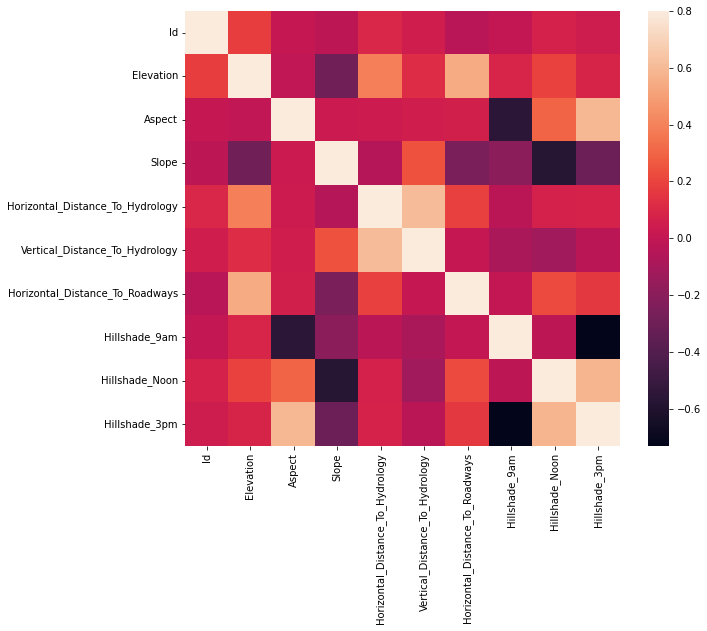

In [ ]:
size = 10 
corrmatrix = df_forest.iloc[:,:size].corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmax=0.8,square = True)

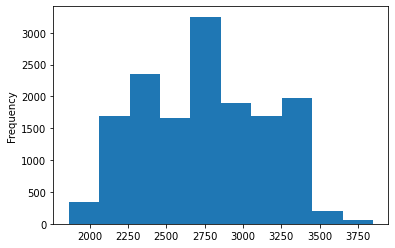

In [ ]:
df_forest['Elevation'].plot(kind='hist')

In [ ]:
# extraemos todas las caracteristicas numericas del Train
num_features = df_forest.iloc[:,:10]

# extraemos todas las caracteristicas binarias del train y luego mostramos en la tabla
cat_features = df_forest.iloc[:, 10:-1]
num_features.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2751.631693,156.951270,16.500000,227.353803,51.329458,1712.428902,212.655721,219.020556,135.156845
std,4364.91237,404.248766,106.645037,8.195506,203.007010,59.313190,1286.306213,29.603854,22.002683,44.638130
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000
25%,3780.75000,2400.000000,69.000000,10.000000,67.000000,6.000000,792.000000,198.000000,208.000000,109.000000
50%,7560.50000,2766.200000,135.000000,16.000000,192.000000,37.000000,1386.000000,218.000000,221.000000,135.500000
75%,11340.25000,3074.000000,247.000000,22.000000,313.000000,75.000000,2190.250000,234.000000,234.000000,165.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000


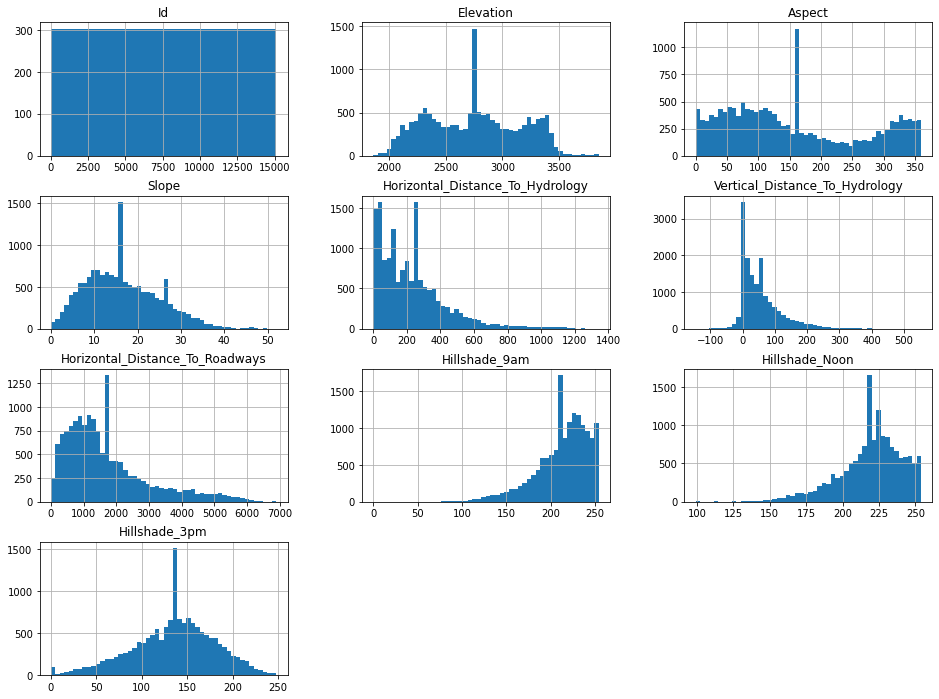

In [ ]:
df_forest.iloc[:,:10].hist(figsize=(16,12), bins=50)
plt.show()